In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv("/kaggle/input/social-media-networks-blessing-or-curse/Social_Media_Networks_Blessing_or_Curse.csv")

In [3]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Example preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Assuming `data.comments` is a Pandas Series
sent = data.comments

# Apply preprocessing to each comment
sentences = sent.apply(preprocess)

print(sentences)


0       [connect, world, become, irrelevent, surrounding]
1           [internet, social, media, keeps, us, updated]
2       [many, activities, social, media, made, make, ...
3                      [activities, negative, influences]
4                           [everyone, gets, information]
                              ...                        
3774                            [promoting, cyber, crime]
3775                     [people, remain, updated, sites]
3776                     [professionals, prefer, twitter]
3777                         [available, info, authentic]
3778            [errors, code, avaailable, social, media]
Name: comments, Length: 3779, dtype: object


In [4]:
from gensim.models import Word2Vec

# Assume 'sentences' is a list of tokenized sentences
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)  # CBOW model

# To save the model
model.save("word2vec.model")


In [5]:
model.train(sentences, total_examples=model.corpus_count, epochs=10)

(163678, 202380)

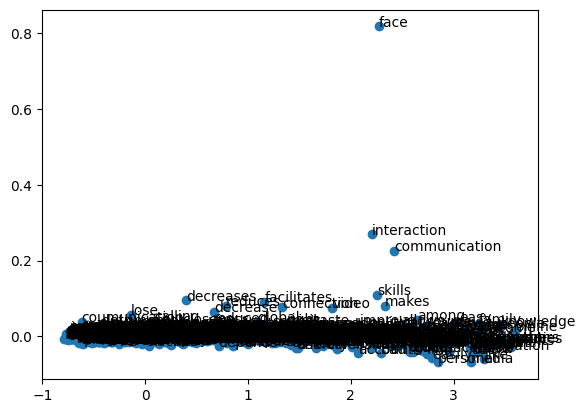

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()

In [7]:
print(model.wv.most_similar("interaction"))

[('communication', 0.9987411499023438), ('skills', 0.9975744485855103), ('reduces', 0.9975358843803406), ('decrease', 0.9975268840789795), ('facilitates', 0.9974687695503235), ('decreases', 0.9974287152290344), ('video', 0.9972453713417053), ('connection', 0.997119665145874), ('makes', 0.9968506693840027), ('reduced', 0.9963053464889526)]
